In [ ]:
import numpy as np
import pandas as pd

import lightgbm as lgbm

import os

import tensorflow as tf
from tensorflow import keras

import matplotlib.pylab as plt
import seaborn as sns

import random

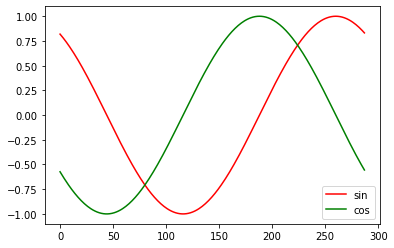

In [ ]:
x = np.arange(0,288,1)
sin = np.sin(2 * np.pi * (x+100)/288)
cos = np.cos(2 * np.pi * (x+100)/288)
plt.plot(sin, c = 'r', label = 'sin')
plt.plot(cos, c = 'g', label = 'cos')
plt.legend()
plt.show()

In [ ]:
#pip install flaml

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_2020 = "/content/drive/MyDrive/발전예측/2ndSpline/df_2020_lstm.csv"
path_2021 = "/content/drive/MyDrive/발전예측/2ndSpline/df_2021_lstm.csv"
df_2020 = pd.read_csv(path_2020)
df_2021 = pd.read_csv(path_2021)
df_2020 = df_2020.drop(['Unnamed: 0', 'datetime', 'wind_speed', 'snow_load'], axis = 1)
df_2021 = df_2021.drop(['Unnamed: 0', 'datetime', 'wind_speed', 'snow_load'], axis = 1)
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105408 entries, 0 to 105407
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   temperature    105408 non-null  float64
 1   precipitation  105408 non-null  float64
 2   humidity       105408 non-null  float64
 3   insolation     105408 non-null  float64
 4   sunlight       105408 non-null  float64
 5   Day sin        105408 non-null  float64
 6   Day cos        105408 non-null  float64
 7   Year sin       105408 non-null  float64
 8   Year cos       105408 non-null  float64
dtypes: float64(9)
memory usage: 7.2 MB


In [ ]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   temperature    105120 non-null  float64
 1   precipitation  105120 non-null  float64
 2   humidity       105120 non-null  float64
 3   insolation     105120 non-null  float64
 4   sunlight       105120 non-null  float64
 5   Day sin        105120 non-null  float64
 6   Day cos        105120 non-null  float64
 7   Year sin       105120 non-null  float64
 8   Year cos       105120 non-null  float64
dtypes: float64(9)
memory usage: 7.2 MB


In [ ]:
df_total = pd.concat([df_2020, df_2021], axis = 0)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210528 entries, 0 to 105119
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   temperature    210528 non-null  float64
 1   precipitation  210528 non-null  float64
 2   humidity       210528 non-null  float64
 3   insolation     210528 non-null  float64
 4   sunlight       210528 non-null  float64
 5   Day sin        210528 non-null  float64
 6   Day cos        210528 non-null  float64
 7   Year sin       210528 non-null  float64
 8   Year cos       210528 non-null  float64
dtypes: float64(9)
memory usage: 16.1 MB


In [ ]:
210528/(12*24)

731.0

In [ ]:
day = 12*24
daylist = {}
k = 1
for i in range(1,732):
    key = i
    value = df_total[(i-1)*day:i*day]
    daylist[key] = value

In [ ]:
insolation_3_x = []
insolation_2_x = []
insolation_1_x = []
insolation_0_x = []

for  k in  range(1,732):
  max_insolation = max(daylist[k]['insolation'])
  if (max_insolation > 3.0):
    insolation_3_x.append(k)
  elif bool(max_insolation > 2.0) & bool(max_insolation < 3.0):
    insolation_2_x.append(k)
  elif bool(max_insolation > 1.0) & bool(max_insolation < 2.0):
    insolation_1_x.append(k)
  else:
    insolation_0_x.append(k)

print(insolation_3_x)
print(insolation_2_x )
print(insolation_1_x )
print(insolation_0_x )

[71, 72, 74, 76, 77, 80, 83, 84, 85, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 104, 105, 107, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 127, 128, 129, 132, 133, 134, 135, 140, 141, 142, 143, 144, 145, 146, 148, 152, 154, 159, 160, 161, 163, 167, 168, 172, 173, 174, 175, 178, 180, 182, 183, 190, 192, 197, 198, 199, 208, 212, 213, 214, 215, 216, 217, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 242, 243, 247, 248, 264, 270, 273, 442, 443, 447, 448, 449, 450, 451, 455, 461, 462, 463, 464, 465, 467, 470, 471, 472, 473, 474, 475, 476, 479, 480, 481, 482, 484, 485, 486, 487, 488, 489, 491, 492, 493, 495, 496, 499, 501, 504, 505, 507, 508, 509, 510, 511, 513, 514, 515, 516, 517, 518, 520, 521, 523, 524, 525, 526, 529, 530, 536, 537, 538, 539, 540, 541, 544, 545, 546, 548, 554, 556, 558, 559, 560, 562, 563, 564, 566, 568, 574, 575, 576, 579, 581, 582, 584, 585, 587, 595, 596, 598, 605, 606, 607, 617, 618, 629, 631]
[4, 7,

#train - test set 나눌 때 하루 단위로 shuffle

In [ ]:
random.seed(0)
random.shuffle(insolation_3_x)
random.shuffle(insolation_2_x)
random.shuffle(insolation_1_x)
random.shuffle(insolation_0_x)

In [ ]:
df_3 = pd.DataFrame()
df_2 = pd.DataFrame()
df_1 = pd.DataFrame()
df_0 = pd.DataFrame()

for i in insolation_3_x:
  df_3 = pd.concat([df_3, daylist[i]],axis = 0)

for i in insolation_2_x:
  df_2 = pd.concat([df_2, daylist[i]],axis = 0)

for i in insolation_1_x:
  df_1 = pd.concat([df_1, daylist[i]],axis = 0)

for i in insolation_0_x:
  df_0 = pd.concat([df_0, daylist[i]],axis = 0)

In [ ]:
def split(df, ratio, target):
  train_ratio = ratio[0]
  val_ratio = ratio[1] + train_ratio
  test_ratio = ratio[2]

  train = df[0:int(len(df)*train_ratio)]
  val = df[int(len(df)*train_ratio):int(len(df)*val_ratio)]
  test = df[int(len(df)*val_ratio):]
  
  Xtrain = train.drop([target], axis = 1)
  Ytrain = train[target]

  Xval = val.drop([target], axis = 1)
  Yval = val[target]

  Xtest = test.drop([target], axis = 1)
  Ytest = test[target]

  return Xtrain, Xval, Xtest, Ytrain, Yval, Ytest

In [ ]:
Xtrain3, Xval3, Xtest3, Ytrain3, Yval3, Ytest3 = split(df_3, [0.7,0.2,0.1], 'sunlight')
Xtrain2, Xval2, Xtest2, Ytrain2, Yval2, Ytest2 = split(df_2, [0.7,0.2,0.1], 'sunlight')
Xtrain1, Xval1, Xtest1, Ytrain1, Yval1, Ytest1 = split(df_1, [0.7,0.2,0.1], 'sunlight')
Xtrain0, Xval0, Xtest0, Ytrain0, Yval0, Ytest0 = split(df_0, [0.7,0.2,0.1], 'sunlight')

In [ ]:
'''from flaml import AutoML
from flaml.data import load_openml_dataset

automl = AutoML()
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'mse',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['lgbm'],  # list of ML learners; we tune lightgbm in this example
    "task": 'regression',  # task type  
    "log_file_name": 'capstone_lgbm_dataset3.log',  # flaml log file
    "seed": 2,    # random seed
}
automl.fit(X_train=Xtrain3, y_train=Ytrain3, **settings)'''

'from flaml import AutoML\nfrom flaml.data import load_openml_dataset\n\nautoml = AutoML()\nsettings = {\n    "time_budget": 60,  # total running time in seconds\n    "metric": \'mse\',  # primary metrics for regression can be chosen from: [\'mae\',\'mse\',\'r2\']\n    "estimator_list": [\'lgbm\'],  # list of ML learners; we tune lightgbm in this example\n    "task": \'regression\',  # task type  \n    "log_file_name": \'capstone_lgbm_dataset3.log\',  # flaml log file\n    "seed": 2,    # random seed\n}\nautoml.fit(X_train=Xtrain3, y_train=Ytrain3, **settings)'

In [ ]:
'''print('Best hyperparmeter config:', automl.best_config)
print('Best mse on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))
print(automl.model.estimator)'''

"print('Best hyperparmeter config:', automl.best_config)\nprint('Best mse on validation data: {0:.4g}'.format(1-automl.best_loss))\nprint('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))\nprint(automl.model.estimator)"

#Best hyperparameter for DataSet0


Best hyperparmeter config: {'n_estimators': 3992, 'num_leaves': 128, 'min_child_samples': 7, 'learning_rate': 0.19204951541448345, 'log_max_bin': 10, 'colsample_bytree': 0.9688030282108253, 'reg_alpha': 0.001899723241110464, 'reg_lambda': 0.14215048821506565}
Best mse on validation data: -2.485e+06
Training duration of best run: 55 s
LGBMRegressor(colsample_bytree=0.9688030282108253,
              learning_rate=0.19204951541448345,
              max_bin=1023,
              min_child_samples=7,
              n_estimators=3992,
              num_leaves=128,
              reg_alpha=0.001899723241110464,
              reg_lambda=0.14215048821506565,
              verbose=-1)

#Best hyperparameter for DataSet1


Best hyperparmeter config: {'n_estimators': 1003, 'num_leaves': 55, 'min_child_samples': 6, 'learning_rate': 0.30595959660642835, 'log_max_bin': 9, 'colsample_bytree': 0.9124736271355562, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.034388933804713244}
Best mse on validation data: -5.909e+06
Training duration of best run: 4.04 s
LGBMRegressor(colsample_bytree=0.9124736271355562,
              learning_rate=0.30595959660642835, max_bin=511,
              min_child_samples=6, n_estimators=1003, num_leaves=55,
              reg_alpha=0.0009765625, reg_lambda=0.034388933804713244,
              verbose=-1)

#Best hyperparameter for DataSet2


Best hyperparmeter config: {'n_estimators': 2952, 'num_leaves': 8, 'min_child_samples': 10, 'learning_rate': 0.5022563094539871, 'log_max_bin': 9, 'colsample_bytree': 0.9124736271355562, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.045269072906584044, 'FLAML_sample_size': 44815}
Best mse on validation data: -1.267e+07
Training duration of best run: 5.242 s
LGBMRegressor(colsample_bytree=0.9124736271355562,
              learning_rate=0.5022563094539871, max_bin=511,
              min_child_samples=10, n_estimators=2952, num_leaves=8,
              reg_alpha=0.0009765625, reg_lambda=0.045269072906584044,
              verbose=-1)


#Best hyperparameter for DataSet3



Best hyperparmeter config: {'n_estimators': 3538, 'num_leaves': 15, 'min_child_samples': 5, 'learning_rate': 0.24338069308637675, 'log_max_bin': 9, 'colsample_bytree': 0.8010090893903528, 'reg_alpha': 0.004259661434607354, 'reg_lambda': 0.0595714441858303}
Best mse on validation data: -9.387e+06
Training duration of best run: 6.26 s
LGBMRegressor(colsample_bytree=0.8010090893903528,
              learning_rate=0.24338069308637675, max_bin=511,
              min_child_samples=5, n_estimators=3538, num_leaves=15,
              reg_alpha=0.004259661434607354, reg_lambda=0.0595714441858303,
              verbose=-1)

#Train

In [ ]:
'''hyper_params_3rd = {
    'task': 'train',
    'n_estimators' : 1000,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.01,
    'feature_fraction': 0.1,
    'bagging_fraction': 0.1,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "n_iter": 1000000
}'''

'hyper_params_3rd = {\n    \'task\': \'train\',\n    \'n_estimators\' : 1000,\n    \'boosting_type\': \'gbdt\',\n    \'objective\': \'regression\',\n    \'metric\': [\'l1\',\'l2\'],\n    \'learning_rate\': 0.01,\n    \'feature_fraction\': 0.1,\n    \'bagging_fraction\': 0.1,\n    \'bagging_freq\': 10,\n    \'verbose\': 0,\n    "max_depth": 8,\n    "num_leaves": 128,  \n    "max_bin": 512,\n    "n_iter": 1000000\n}'

In [ ]:
model_3rd_q09 = lgbm.LGBMRegressor(
    objective = 'quantile',
    metric = ['quantile'],
    alpha = 0.9,
    colsample_bytree=0.8010090893903528,
    learning_rate=0.24338069308637675, max_bin=511,
    min_child_samples=5, n_estimators=3538, num_leaves=15,
    reg_alpha=0.004259661434607354, reg_lambda=0.0595714441858303,
    verbose=-1, n_iter = 1000000)

In [ ]:
model_3rd_q09.fit(Xtrain3, Ytrain3,
              eval_set=[(Xval3, Yval3)],
              eval_metric='l1',
              early_stopping_rounds=10000
            )

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[5069]	valid_0's quantile: 3181.07	valid_0's l1: 10160.1
[5070]	valid_0's quantile: 3181.06	valid_0's l1: 10160.1
[5071]	valid_0's quantile: 3181.12	valid_0's l1: 10160.1
[5072]	valid_0's quantile: 3181.18	valid_0's l1: 10160.2
[5073]	valid_0's quantile: 3181.18	valid_0's l1: 10160.1
[5074]	valid_0's quantile: 3181.18	valid_0's l1: 10160.1
[5075]	valid_0's quantile: 3181.18	valid_0's l1: 10160.1
[5076]	valid_0's quantile: 3181.21	valid_0's l1: 10160.1
[5077]	valid_0's quantile: 3181.22	valid_0's l1: 10160.1
[5078]	valid_0's quantile: 3181.26	valid_0's l1: 10160
[5079]	valid_0's quantile: 3182.24	valid_0's l1: 10160.5
[5080]	valid_0's quantile: 3182.48	valid_0's l1: 10160.8
[5081]	valid_0's quantile: 3182.49	valid_0's l1: 10160.7
[5082]	valid_0's quantile: 3182.49	valid_0's l1: 10160.7
[5083]	valid_0's quantile: 3182.5	valid_0's l1: 10160.7
[5084]	valid_0's quantile: 3182.51	valid_0's l1: 10160.7
[5085]	valid_0's quantile: 3182.51	valid_0's l1: 10160.

LGBMRegressor(alpha=0.9, colsample_bytree=0.8010090893903528,
              learning_rate=0.24338069308637675, max_bin=511,
              metric=['quantile'], min_child_samples=5, n_estimators=3538,
              n_iter=1000000, num_leaves=15, objective='quantile',
              reg_alpha=0.004259661434607354, reg_lambda=0.0595714441858303,
              verbose=-1)

In [ ]:
model_3rd_q01 = lgbm.LGBMRegressor(
    objective = 'quantile',
    metric = ['quantile'],
    alpha = 0.1,
    colsample_bytree=0.8010090893903528,
    learning_rate=0.24338069308637675, max_bin=511,
    min_child_samples=5, n_estimators=3538, num_leaves=15,
    reg_alpha=0.004259661434607354, reg_lambda=0.0595714441858303,
    verbose=-1, n_iter = 1000000)

In [ ]:
model_3rd_q01.fit(Xtrain3, Ytrain3,
              eval_set=[(Xval3, Yval3)],
              eval_metric='l1',
              early_stopping_rounds=10000
            )

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[5244]	valid_0's quantile: 3228.27	valid_0's l1: 10007.9
[5245]	valid_0's quantile: 3228.28	valid_0's l1: 10007.9
[5246]	valid_0's quantile: 3228.28	valid_0's l1: 10007.9
[5247]	valid_0's quantile: 3228.23	valid_0's l1: 10007.4
[5248]	valid_0's quantile: 3228.23	valid_0's l1: 10007.4
[5249]	valid_0's quantile: 3228.26	valid_0's l1: 10007.4
[5250]	valid_0's quantile: 3228.29	valid_0's l1: 10007.6
[5251]	valid_0's quantile: 3228.29	valid_0's l1: 10007.6
[5252]	valid_0's quantile: 3228.29	valid_0's l1: 10007.6
[5253]	valid_0's quantile: 3228.31	valid_0's l1: 10007.5
[5254]	valid_0's quantile: 3228.31	valid_0's l1: 10007.5
[5255]	valid_0's quantile: 3228.32	valid_0's l1: 10007.5
[5256]	valid_0's quantile: 3228.34	valid_0's l1: 10007.5
[5257]	valid_0's quantile: 3228.31	valid_0's l1: 10007.6
[5258]	valid_0's quantile: 3228.28	valid_0's l1: 10007.6
[5259]	valid_0's quantile: 3228.3	valid_0's l1: 10007.5
[5260]	valid_0's quantile: 3228.3	valid_0's l1: 10007

LGBMRegressor(alpha=0.1, colsample_bytree=0.8010090893903528,
              learning_rate=0.24338069308637675, max_bin=511,
              metric=['quantile'], min_child_samples=5, n_estimators=3538,
              n_iter=1000000, num_leaves=15, objective='quantile',
              reg_alpha=0.004259661434607354, reg_lambda=0.0595714441858303,
              verbose=-1)

In [ ]:
pred_3_01 = model_3rd_q01.predict(Xtest3)
pred_3_09 = model_3rd_q09.predict(Xtest3)

In [ ]:
model_3rd_q01.booster_.save_model('mode1_5m_v1_q01.txt')
model_3rd_q09.booster_.save_model('mode1_5m_v1_q09.txt')

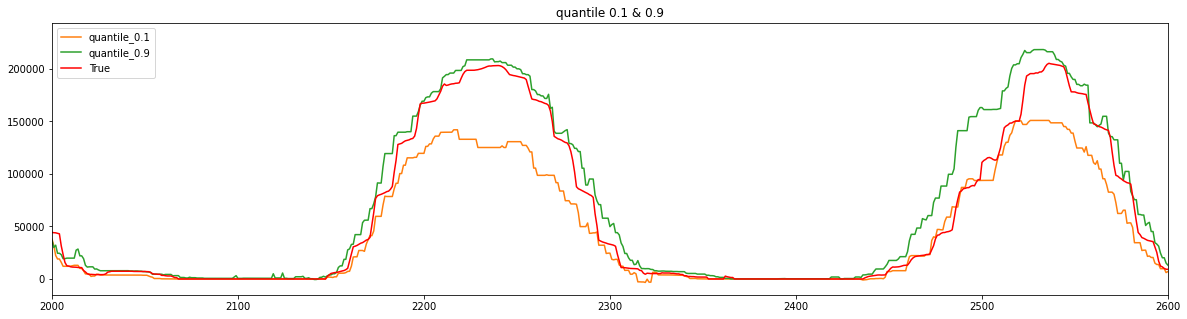

In [ ]:
show_location = 2000
plt.figure(figsize=(20,5))
plt.plot(pred_3_01, c = 'C1', label = 'quantile_0.1')
plt.plot(pred_3_09, c = 'C2', label = 'quantile_0.9')
plt.plot(Ytest3.reset_index(drop=True), c = 'r', label = 'True')
plt.title('quantile 0.1 & 0.9')
plt.xlim(show_location, show_location+600)
plt.legend()
plt.show()

In [ ]:
'''hyper_params_2nd = {
    'task': 'train',
    'n_estimators' : 1000,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.01,
    'feature_fraction': 0.1,
    'bagging_fraction': 0.1,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "n_iter": 1000000
}'''

In [ ]:
model_2nd_q09 = lgbm.LGBMRegressor(colsample_bytree=0.9124736271355562,
                               objective = 'quantile',
                               metric = ['quantile'],
                               alpha = 0.9,
              learning_rate=0.5022563094539871, max_bin=511,
              min_child_samples=10, n_estimators=2952, num_leaves=8,
              reg_alpha=0.0009765625, reg_lambda=0.045269072906584044,
              verbose=-1, n_iter = 1000000)

In [ ]:
model_2nd_q09.fit(Xtrain2, Ytrain2,
            eval_set=[(Xval2, Yval2)],
            eval_metric='l1',
            early_stopping_rounds=10000
            )

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[5015]	valid_0's quantile: 3699.79	valid_0's l1: 9158.06
[5016]	valid_0's quantile: 3700.55	valid_0's l1: 9158.7
[5017]	valid_0's quantile: 3700.6	valid_0's l1: 9158.74
[5018]	valid_0's quantile: 3700.61	valid_0's l1: 9158.73
[5019]	valid_0's quantile: 3700.62	valid_0's l1: 9158.73
[5020]	valid_0's quantile: 3700.65	valid_0's l1: 9158.73
[5021]	valid_0's quantile: 3700.62	valid_0's l1: 9158.51
[5022]	valid_0's quantile: 3700.57	valid_0's l1: 9159.12
[5023]	valid_0's quantile: 3700.58	valid_0's l1: 9159.1
[5024]	valid_0's quantile: 3700.57	valid_0's l1: 9159.12
[5025]	valid_0's quantile: 3700.53	valid_0's l1: 9159.12
[5026]	valid_0's quantile: 3700.53	valid_0's l1: 9159.12
[5027]	valid_0's quantile: 3700.63	valid_0's l1: 9159.24
[5028]	valid_0's quantile: 3700.63	valid_0's l1: 9159.24
[5029]	valid_0's quantile: 3700.63	valid_0's l1: 9159.21
[5030]	valid_0's quantile: 3700.64	valid_0's l1: 9159.21
[5031]	valid_0's quantile: 3700.62	valid_0's l1: 9159.0

LGBMRegressor(alpha=0.9, colsample_bytree=0.9124736271355562,
              learning_rate=0.5022563094539871, max_bin=511,
              metric=['quantile'], min_child_samples=10, n_estimators=2952,
              n_iter=1000000, num_leaves=8, objective='quantile',
              reg_alpha=0.0009765625, reg_lambda=0.045269072906584044,
              verbose=-1)

In [ ]:
model_2nd_q01 = lgbm.LGBMRegressor(colsample_bytree=0.9124736271355562,
                               objective = 'quantile',
                               metric = ['quantile'],
                               alpha = 0.1,
              learning_rate=0.5022563094539871, max_bin=511,
              min_child_samples=10, n_estimators=2952, num_leaves=8,
              reg_alpha=0.0009765625, reg_lambda=0.045269072906584044,
              verbose=-1, n_iter = 1000000)

In [ ]:
model_2nd_q01.fit(Xtrain2, Ytrain2,
            eval_set=[(Xval2, Yval2)],
            eval_metric='l1',
            early_stopping_rounds=10000
            )

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[5971]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5972]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5973]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5974]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5975]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5976]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5977]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5978]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5979]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5980]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5981]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5982]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5983]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5984]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5985]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5986]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5987]	valid_0's quantile: 2099.4	valid_0's l1: 18714.2
[5988]	valid

LGBMRegressor(alpha=0.1, colsample_bytree=0.9124736271355562,
              learning_rate=0.5022563094539871, max_bin=511,
              metric=['quantile'], min_child_samples=10, n_estimators=2952,
              n_iter=1000000, num_leaves=8, objective='quantile',
              reg_alpha=0.0009765625, reg_lambda=0.045269072906584044,
              verbose=-1)

In [ ]:
pred_2_01 = model_2nd_q01.predict(Xtest2)
pred_2_09 = model_2nd_q09.predict(Xtest2)

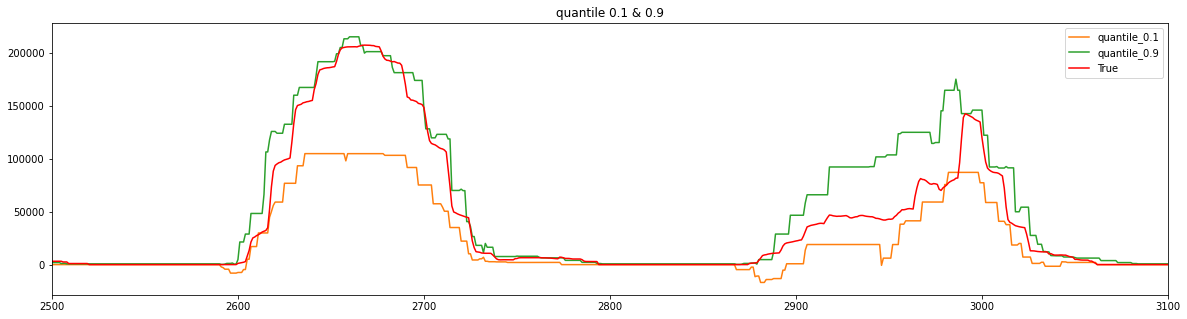

In [ ]:
show_location = 2500
plt.figure(figsize=(20,5))
plt.plot(pred_2_01, c = 'C1', label = 'quantile_0.1')
plt.plot(pred_2_09, c = 'C2', label = 'quantile_0.9')
plt.plot(Ytest2.reset_index(drop=True), c = 'r', label = 'True')
plt.title('quantile 0.1 & 0.9')
plt.xlim(show_location, show_location+600)
plt.legend()
plt.show()

In [ ]:
model_2nd_q01.booster_.save_model('mode2_5m_v1_q01.txt')
model_2nd_q09.booster_.save_model('mode2_5m_v1_q09.txt')

In [ ]:
'''hyper_params_1st = {
    'task': 'train',
    'n_estimators' : 1000,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.1,
    'bagging_fraction': 0.1,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "n_iter": 100000
}'''

In [ ]:
model_1st_q09 = lgbm.LGBMRegressor(
    objective = 'quantile',
    metirc = ['quantile'],
    alpha = 0.9,
    colsample_bytree=0.9124736271355562,
    learning_rate=0.30595959660642835, max_bin=511,
    min_child_samples=6, n_estimators=1003, num_leaves=55,
    reg_alpha=0.0009765625, reg_lambda=0.034388933804713244,
    verbose=-1, n_iter = 1000000)

In [ ]:
pred_1_01 = model_1st_q01.predict(Xtest1)
pred_1_09 = model_1st_q09.predict(Xtest1)

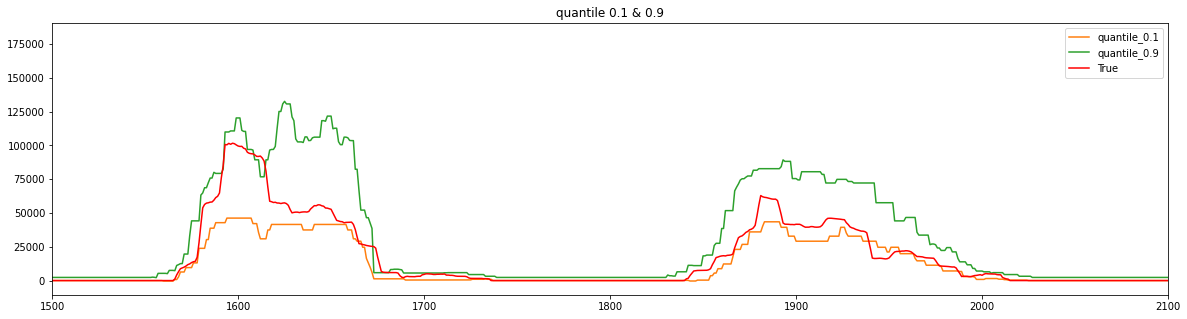

In [ ]:
show_location = 1500
plt.figure(figsize=(20,5))
plt.plot(pred_1_01, c = 'C1', label = 'quantile_0.1')
plt.plot(pred_1_09, c = 'C2', label = 'quantile_0.9')
plt.plot(Ytest1.reset_index(drop=True), c = 'r', label = 'True')
plt.title('quantile 0.1 & 0.9')
plt.xlim(show_location, show_location+600)
plt.legend()
plt.show()

In [ ]:
model_1st_q01.booster_.save_model('mode1_5m_v1_q01.txt')
model_1st_q09.booster_.save_model('mode1_5m_v1_q09.txt')

In [ ]:
'''hyper_params_0th = {
    'task': 'train',
    'n_estimators' : 1000,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.1,
    'bagging_fraction': 0.1,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "n_iter": 1000000
}'''

In [ ]:
model_0th_q01 = lgbm.LGBMRegressor(
    colsample_bytree=0.9688030282108253,
    objective = 'quantile',
    metric = ['quantile'],
    alpha = 0.1,
              learning_rate=0.19204951541448345,
              max_bin=1023,
              min_child_samples=7,
              n_estimators=3992,
              num_leaves=128,
              reg_alpha=0.001899723241110464,
              reg_lambda=0.14215048821506565,
              verbose=-1,
              n_iter = 1000000)

In [ ]:
model_0th_q09 = lgbm.LGBMRegressor(
    colsample_bytree=0.9688030282108253,
    objective = 'quantile',
    metric = ['quantile'],
    alpha = 0.9,
              learning_rate=0.19204951541448345,
              max_bin=1023,
              min_child_samples=7,
              n_estimators=3992,
              num_leaves=128,
              reg_alpha=0.001899723241110464,
              reg_lambda=0.14215048821506565,
              verbose=-1,
              n_iter = 1000000)

In [ ]:
model_0th_q01.fit(Xtrain0, Ytrain0,
            eval_set=[(Xval0, Yval0)],
            eval_metric='l1',
            early_stopping_rounds=1000
            )

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's quantile: 1373.5	valid_0's l1: 13685.1
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's quantile: 1327.85	valid_0's l1: 13159.9
[3]	valid_0's quantile: 1294.81	valid_0's l1: 12776.5
[4]	valid_0's quantile: 1265.65	valid_0's l1: 12427
[5]	valid_0's quantile: 1231.2	valid_0's l1: 12046.3
[6]	valid_0's quantile: 1198.95	valid_0's l1: 11668.2
[7]	valid_0's quantile: 1168.5	valid_0's l1: 11311
[8]	valid_0's quantile: 1142.31	valid_0's l1: 10985.9
[9]	valid_0's quantile: 1117.56	valid_0's l1: 10673.4
[10]	valid_0's quantile: 1094.68	valid_0's l1: 10374.9
[11]	valid_0's quantile: 1079.26	valid_0's l1: 10174.4
[12]	valid_0's quantile: 1053.46	valid_0's l1: 9891.72
[13]	valid_0's quantile: 1041.69	valid_0's l1: 9707.32
[14]	valid_0's quantile: 1035.57	valid_0's l1: 9574.2
[15]	valid_0's quantile: 1026.02	valid_0's l1: 9394.05
[16]	valid_0's quantile: 1017.84	valid_0's l1: 9235.69
[17]	valid_0's quantile: 1001.84	valid_0's l1: 9039.53
[18]	valid_0's qua

LGBMRegressor(alpha=0.1, colsample_bytree=0.9688030282108253,
              learning_rate=0.19204951541448345, max_bin=1023,
              metric=['quantile'], min_child_samples=7, n_estimators=3992,
              n_iter=1000000, num_leaves=128, objective='quantile',
              reg_alpha=0.001899723241110464, reg_lambda=0.14215048821506565,
              verbose=-1)

In [ ]:
model_0th_q09.fit(Xtrain0, Ytrain0,
            eval_set=[(Xval0, Yval0)],
            eval_metric='l1',
            early_stopping_rounds=1000
            )

[1]	valid_0's quantile: 4847.65	valid_0's l1: 31877.8
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's quantile: 4318.5	valid_0's l1: 27508.4
[3]	valid_0's quantile: 3992.25	valid_0's l1: 23918.5
[4]	valid_0's quantile: 3606.53	valid_0's l1: 20956.2
[5]	valid_0's quantile: 3299.74	valid_0's l1: 18566.9


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_iter` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[6]	valid_0's quantile: 3058.4	valid_0's l1: 16511.1
[7]	valid_0's quantile: 2879.59	valid_0's l1: 14937.1
[8]	valid_0's quantile: 2740.23	valid_0's l1: 13577.6
[9]	valid_0's quantile: 2626.33	valid_0's l1: 12500.4
[10]	valid_0's quantile: 2539.03	valid_0's l1: 11672.5
[11]	valid_0's quantile: 2484.34	valid_0's l1: 10932.5
[12]	valid_0's quantile: 2417.66	valid_0's l1: 10312.5
[13]	valid_0's quantile: 2396.71	valid_0's l1: 9864.17
[14]	valid_0's quantile: 2374.94	valid_0's l1: 9435.77
[15]	valid_0's quantile: 2358.04	valid_0's l1: 9127.95
[16]	valid_0's quantile: 2341.68	valid_0's l1: 8835.22
[17]	valid_0's quantile: 2324.95	valid_0's l1: 8554.23
[18]	valid_0's quantile: 2313.77	valid_0's l1: 8367.7
[19]	valid_0's quantile: 2310.09	valid_0's l1: 8233.73
[20]	valid_0's quantile: 2309.66	valid_0's l1: 8107.14
[21]	valid_0's quantile: 2314.45	valid_0's l1: 7981.48
[22]	valid_0's quantile: 2315.62	valid_0's l1: 7869.78
[23]	valid_0's quantile: 2323.26	valid_0's l1: 7763.5
[24]	valid_0's qu

LGBMRegressor(alpha=0.9, colsample_bytree=0.9688030282108253,
              learning_rate=0.19204951541448345, max_bin=1023,
              metric=['quantile'], min_child_samples=7, n_estimators=3992,
              n_iter=1000000, num_leaves=128, objective='quantile',
              reg_alpha=0.001899723241110464, reg_lambda=0.14215048821506565,
              verbose=-1)

In [ ]:
pred_0_01 = model_0th_q01.predict(Xtest0)
pred_0_09 = model_0th_q09.predict(Xtest0)

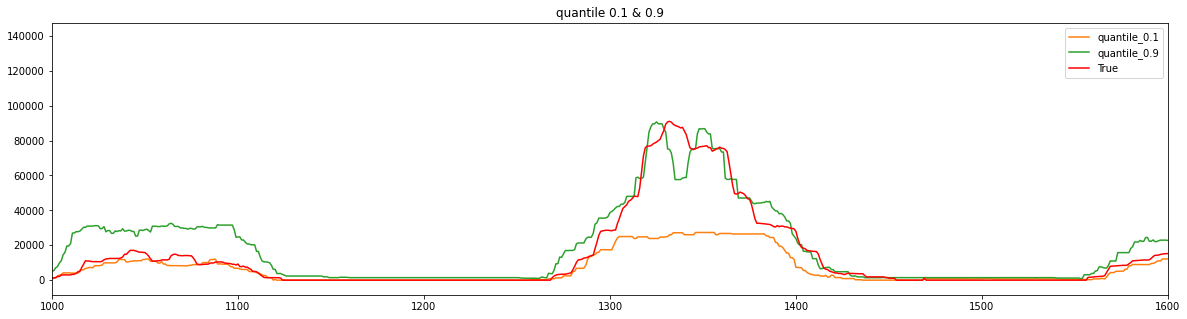

In [ ]:
show_location = 1000
plt.figure(figsize=(20,5))
plt.plot(pred_0_01, c = 'C1', label = 'quantile_0.1')
plt.plot(pred_0_09, c = 'C2', label = 'quantile_0.9')
plt.plot(Ytest0.reset_index(drop=True), c = 'r', label = 'True')
plt.title('quantile 0.1 & 0.9')
plt.xlim(show_location, show_location+600)
plt.legend()
plt.show()

In [ ]:
model_0th_q01.booster_.save_model('mode0_5m_v1_q01.txt')
model_0th_q09.booster_.save_model('mode0_5m_v1_q09.txt')

In [ ]:
pred3 = model_3rd.predict(Xtest3)
pred2 = model_2nd.predict(Xtest2)
pred1 = model_1st.predict(Xtest1)
pred0 = model_0th.predict(Xtest0)

In [ ]:
'''pd.DataFrame(pred3).to_csv('pred3.csv')
pd.DataFrame(pred2).to_csv('pred2.csv')
pd.DataFrame(pred1).to_csv('pred1.csv')
pd.DataFrame(pred0).to_csv('pred0.csv')'''

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE3 = mean_squared_error(Ytest3, pred3)**0.5
RMSE2 = mean_squared_error(Ytest2, pred2)**0.5
RMSE1 = mean_squared_error(Ytest1, pred1)**0.5
RMSE0 = mean_squared_error(Ytest0, pred0)**0.5
print('\n\nRMSE3 = ', RMSE3)
print('\n\nRMSE2 = ', RMSE2)
print('\n\nRMSE1 = ', RMSE1)
print('\n\nRMSE0 = ', RMSE0)



RMSE3 =  16483.761743032912


RMSE2 =  19576.24535038498


RMSE1 =  15851.293562302355


RMSE0 =  8562.653907042357


No handles with labels found to put in legend.


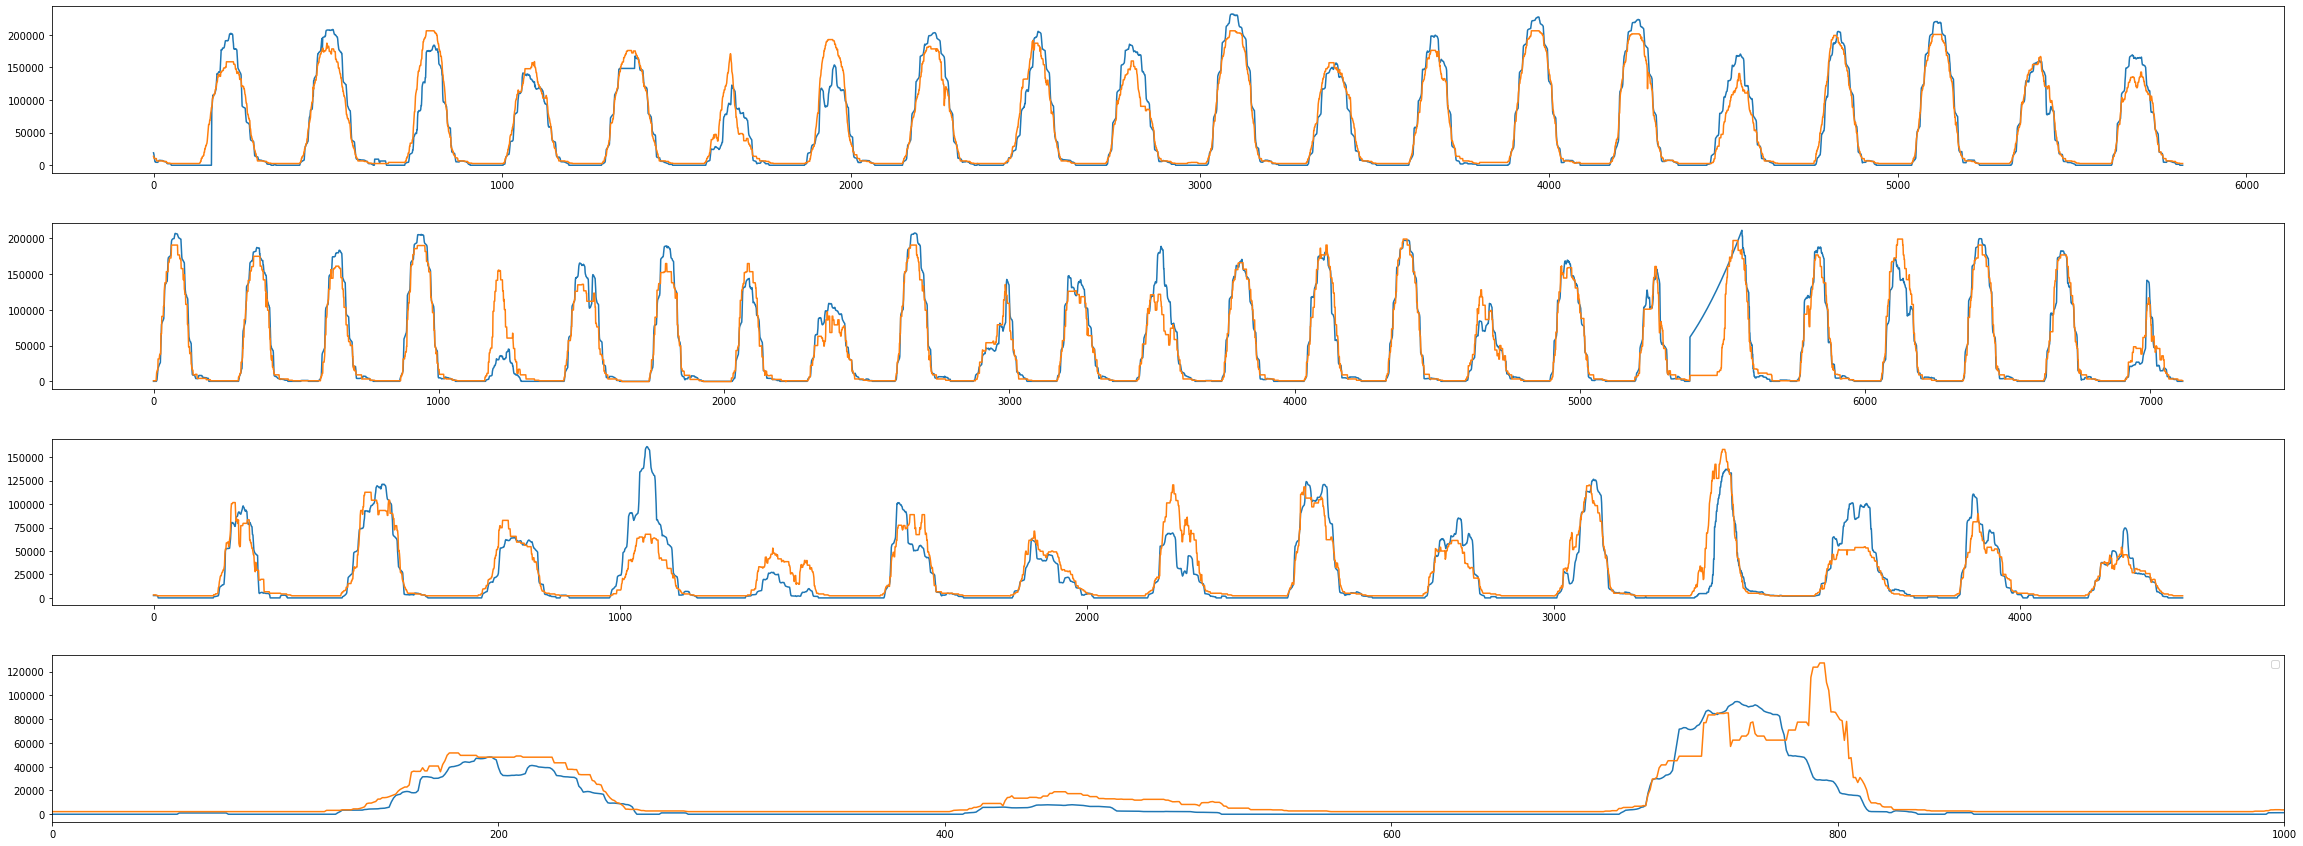

In [ ]:
f, ax = plt.subplots(4,1)
f.set_size_inches((40,15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.xlim([0,1000])
plt.legend()

ax[0].plot(Ytest3.reset_index(drop=True), label='true')
ax[0].plot(pred3, label='pred')

ax[1].plot(Ytest2.reset_index(drop=True), label='true')
ax[1].plot(pred2, label='pred')

ax[2].plot(Ytest1.reset_index(drop=True), label='true')
ax[2].plot(pred1, label='pred')

ax[3].plot(Ytest0.reset_index(drop=True), label='true')
ax[3].plot(pred0, label='pred')

plt.show()

#제주도 태양광 설비용량 491.8MW

In [ ]:
Ytest = {0:Ytest0, 1:Ytest1, 2:Ytest2, 3:Ytest3}
pred = {0:pred0, 1:pred1, 2:pred2, 3:pred3}

In [ ]:
def printError(pred, df_y):
  error = []
  for i in range(len(df_y)):
    error = error + [(abs(df_y.reset_index(drop=True)[i] - pred[i])*1000)/(491.8*1000000)*100]
    
  ax = np.linspace(0,len(df_y),len(df_y))
  plt.plot(ax, error)
  plt.title('Error - Percentage')
  plt.xlabel('5minute')
  plt.ylabel('Percentage')
  plt.show()

  mean_error = (sum(error)/len(error))
  print('\n\nVal_set Mean Error-Percentage : {0:0.4f} %'.format(mean_error))

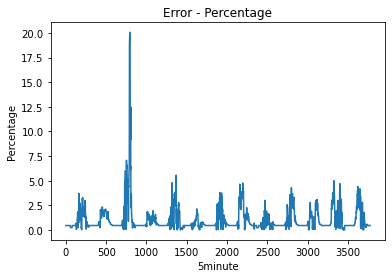



Val_set Mean Error-Percentage : 1.0257 %


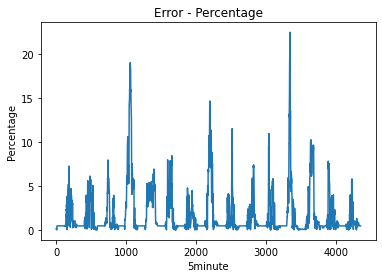



Val_set Mean Error-Percentage : 1.7407 %


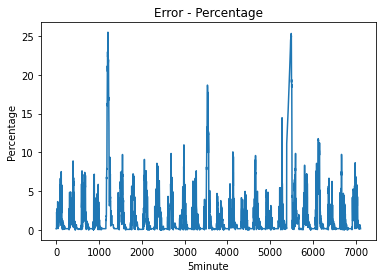



Val_set Mean Error-Percentage : 1.9333 %


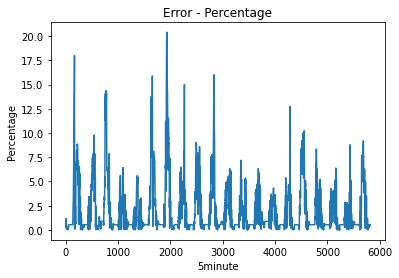



Val_set Mean Error-Percentage : 2.0327 %


In [ ]:
for i in range(3):
  printError(pred[i],Ytest[i])
printError(pred[3],Ytest[3])

In [ ]:
model_1st.booster_.save_model('mode1_5m_v1.txt')
model_2nd.booster_.save_model('mode2_5m_v1.txt')
model_3rd.booster_.save_model('mode3_5m_v1.txt')
model_0th.booster_.save_model('mode0_5m_v1.txt')

In [ ]:
bst1 = lgbm.Booster(model_file = 'mode1_5m_v1.txt')

In [ ]:
pred1_load = bst1.predict(Xtest1)

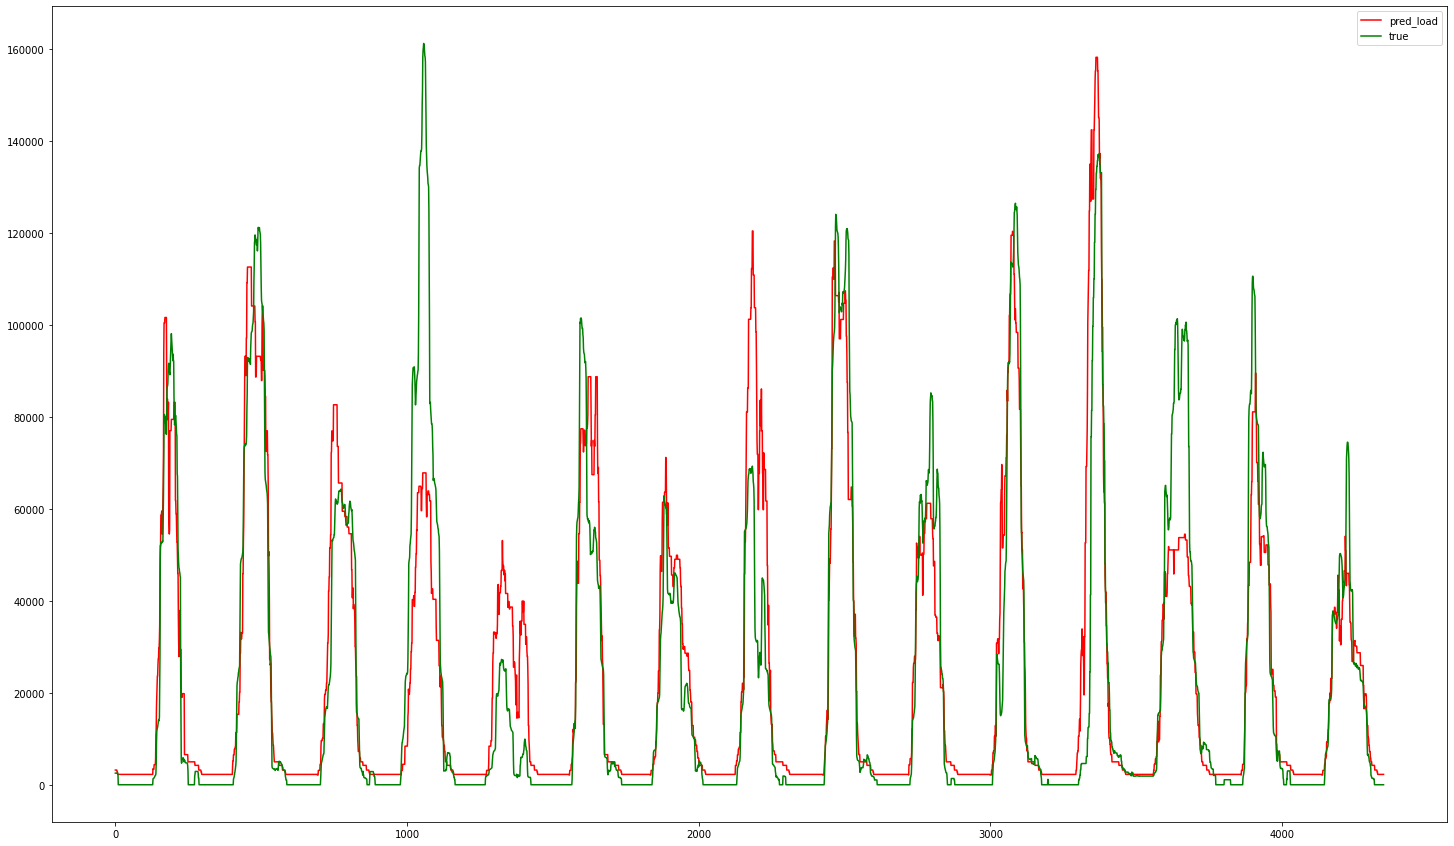

In [ ]:
plt.figure(figsize=(25,15))
plt.plot(pred1_load, c = 'r', label = 'pred_load')
plt.plot(Ytest1.reset_index(drop=True), c = 'g', label = 'true')
plt.legend()
plt.show()